**Importing The Required Libraries**

In [1]:
import tensorflow 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D 
from keras.optimizers import Adam 
from keras.utils import np_utils 
import numpy

**Loading The Data**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Analyzing The Data**

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

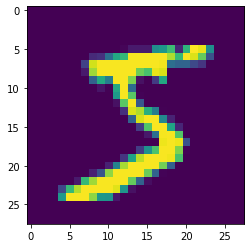

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

**Reshaping The Data**

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') 
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

**Applying One Hot Encoding**

In [8]:
number_of_classes = 10 
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Model Building

**Add CNN Layers**

In [9]:
model = Sequential()
model.add(Conv2D (64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D (32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

**Compiling The Model**

In [10]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

**Train The Model**

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 385s 203ms/step - loss: 0.2750 - accuracy: 0.9512 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 2/10
1875/1875 [==============================] - 352s 188ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0924 - val_accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 367s 196ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0771 - val_accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 403s 215ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0872 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 405s 216ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0985 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 447s 239ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.1611 - val_accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 405s 216ms/step - loss: 0.0240 - accuracy: 0.9930 - val_

**Observing The Metrics**

In [12]:
metrics = model.evaluate(X_test, y_test, verbose=0) 
print("Metrics (Test loss & Test Accuracy): ") 
print(metrics)

Metrics (Test loss & Test Accuracy): 
[0.15329968929290771, 0.9772999882698059]


**Test The Model**

In [13]:
prediction=model.predict(X_test[:4]) 
print (prediction)

1/1 [==============================] - 1s 768ms/step
[[1.0857199e-18 2.1145464e-30 7.0113629e-16 1.1680500e-20 1.8435780e-25
  5.2242111e-25 5.5664750e-31 1.0000000e+00 4.3954972e-20 1.5664223e-17]
 [1.3340850e-16 2.7740623e-16 1.0000000e+00 2.8711814e-19 3.6351769e-21
  6.3698570e-24 6.7587090e-14 4.9532856e-24 3.7661351e-16 2.9315632e-28]
 [5.3127663e-10 9.9997842e-01 7.1989086e-12 1.8439388e-18 2.1405183e-05
  3.5915591e-12 6.1843618e-13 3.6695417e-12 6.3014603e-08 2.5819782e-16]
 [1.0000000e+00 5.5646002e-26 2.9324953e-18 2.0067744e-24 3.5023494e-21
  7.6626303e-20 3.3256681e-17 1.7744768e-22 2.6976911e-17 3.1728283e-18]]


In [14]:
import numpy as np
print (np.argmax(prediction, axis=1))
print (y_test[:4]) 

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Observing The Metrics**

In [15]:
metrics = model.evaluate(X_test, y_test, verbose=0) 
print("Metrics (Test loss & Test Accuracy): ") 
print(metrics)

Metrics (Test loss & Test Accuracy): 
[0.15329968929290771, 0.9772999882698059]


**Test The Model**

In [16]:
prediction=model.predict(X_test[:4]) 
print (prediction)

1/1 [==============================] - 0s 80ms/step
[[1.0857199e-18 2.1145464e-30 7.0113629e-16 1.1680500e-20 1.8435780e-25
  5.2242111e-25 5.5664750e-31 1.0000000e+00 4.3954972e-20 1.5664223e-17]
 [1.3340850e-16 2.7740623e-16 1.0000000e+00 2.8711814e-19 3.6351769e-21
  6.3698570e-24 6.7587090e-14 4.9532856e-24 3.7661351e-16 2.9315632e-28]
 [5.3127663e-10 9.9997842e-01 7.1989086e-12 1.8439388e-18 2.1405183e-05
  3.5915591e-12 6.1843618e-13 3.6695417e-12 6.3014603e-08 2.5819782e-16]
 [1.0000000e+00 5.5646002e-26 2.9324953e-18 2.0067744e-24 3.5023494e-21
  7.6626303e-20 3.3256681e-17 1.7744768e-22 2.6976911e-17 3.1728283e-18]]


In [20]:
import numpy as np
print (np.argmax(prediction, axis=1))
print (y_test[:4]) 

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Save The Model**

In [23]:
model.save('models/mnistCNN.h5')

**Test With Saved Model**

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

model = load_model('C:/Users/Guru/Handwritten Digit Recoginition System/models/mnistCNN.h5') 
img = image.load_img('C:/Users/Guru/Handwritten Digit Recoginition System/data/image-2.jpg', target_size=(28,28), grayscale=True)
img = image.img_to_array(img) 
print(img.shape)
x = np.expand_dims(img,axis=0)
print(x.shape) 
print('*'*50)
print(model.predict(x))
print('*'*50)
print(np.round_(model.predict(x)))


(28, 28, 1)
(1, 28, 28, 1)
**************************************************
1/1 [==============================] - 0s 217ms/step
[[1.6185023e-10 1.1487779e-11 9.9973482e-01 5.2156115e-09 5.7850588e-13
  2.2684069e-16 3.1574066e-16 2.6516631e-04 2.3191360e-10 3.6229517e-14]]
**************************************************
1/1 [==============================] - 0s 82ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
